# Pronóstico de disponibilidad de los recursos de generación de la central TermoGuajira a partir de modelos de aprendizaje automático

## 1. Introducción

El Centro Nacional de Despacho (CND) ha identificado restricciones eléctricas en la subárea GCM del sistema eléctrico colombiano, lo cual ha llevado a declarar un estado de emergencia desde abril de 2022. En el estado actual del sistema eléctrico, la disponibilidad de los recursos de generación internos en esta subárea es crucial para garantizar la seguridad y confiabilidad del sistema eléctrico, ya que su ausencia puede desencadenar eventos no deseados y afectar a los usuarios finales. Por lo tanto, el objetivo de este proyecto es predecir la disponibilidad de los recursos de generación en la subárea GCM mediante un modelo de machine learning, con el fin de implementar medidas preventivas y estrategias de contingencia que minimicen el riesgo de indisponibilidades no programadas y aseguren el suministro eléctrico confiable. El proyecto seguirá pasos metodológicos, como el análisis exploratorio de datos, el desarrollo del modelo de machine learning y la validación exhaustiva de las predicciones generadas.

## 2. Recopilación de datos

La recopilación de datos relacionados con la disponibilidad de los recursos de generación se realizó mediante la extracción de información de fuentes públicas proporcionadas por el administrador del mercado XM.

Dentro del aplicativo SINERGOX de XM,[SINERGOX XM](https://sinergox.xm.com.co/Paginas/Home.aspx), que se presenta en la sección de oferta y generación, se encuentran datos cruciales para cada recurso de generación inscrito ante el mercado eléctrica. Estos datos proporcionan una visión detallada de la operación de las unidades. A continuación, se detallan los tipos de datos disponibles:


1. **Disponibilidad:** La variable de Disponibilidad es un aspecto crucial, ya que proporciona información sobre la cantidad de energía que está disponible en cada recurso de generación, medida en kilovatios-hora (kWh). Esta disponibilidad comercial es esencial para comprender la capacidad de un recurso para suministrar energía en un momento dado. No solo indica si un recurso está disponible o no, sino también cuánta energía puede generar en un período de tiempo específico.
2. **Generación:** Cantidad de energía producida efectivamente por cada recurso de generación en cada hora. Este dato, también expresado en kilovatios-hora (kWh), proporciona información sobre el rendimiento real de los recursos en términos de producción de energía.
3. **Combustible:** Este variable refleja la cantidad de combustible consumido por cada recurso de generación en su proceso de producción de energía. Medido en millones de unidades térmicas británicas (MBTU), este indicador es vital para evaluar la eficiencia operativa asociados con el consumo de combustible.  

![Aplicativo Sinergox XM](sinergox.PNG)

In [1]:
# librerias

# Transformación y Manipulación de datos
import numpy as np
import pandas as pd
from datetime import datetime

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# modelado
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
import pycaret
from pycaret.classification import *
from pycaret.classification import compare_models
from pycaret.classification import create_model
from pycaret.classification import plot_model, interpret_model
from pycaret.classification import evaluate_model

c:\Users\uenergia\AppData\Local\Programs\Python\Python36\lib\site-packages\pycaret\loggers\mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


In [2]:
# Importando Database
df_data = pd.read_csv('./operation_database.csv',sep=';')
df_data.head()

,FECHA,RECURSO,CODIGO,HORA01,HORA02,HORA03,HORA04,HORA05,HORA06,HORA07,HORA08,HORA09,HORA10,HORA11,HORA12,HORA13,HORA14,HORA15,HORA16,HORA17,HORA18,HORA19,HORA20,HORA21,HORA22,HORA23,HORA24
0,1/10/2005,TGJ1,DCOM,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0
1,2/10/2005,TGJ1,DCOM,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0
2,3/10/2005,TGJ1,DCOM,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0
3,4/10/2005,TGJ1,DCOM,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0
4,5/10/2005,TGJ1,DCOM,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0,151000.0


Durante la etapa de preparación de datos, se llevó a cabo un proceso destinado a optimizar la calidad y la coherencia de la información para su posterior análisis y comprensión. Para ello, en primer lugar, se creó una copia del DataFrame original, una práctica para preservar la integridad de los datos originales y permitir la reversión de cambios en caso necesario.

Posteriormente, se procedió a una estandarización de los nombres de las columnas con el fin de garantizar la uniformidad y la consistencia en todo el conjunto de datos. Este proceso implicó la conversión de los nombres de las columnas a minúsculas y, específicamente para aquellas relacionadas con las horas del día, se extrajo el número de hora para su posterior uso en el análisis. De esta manera, se logró una estructura homogénea en todo el DataFrame.

A continuación, se aplicó la función melt() para pivotar la tabla, reorganizando los datos de manera que cada fila representara una combinación única de identificadores de recursos y fechas. Esta operación facilitó la manipulación y la visualización de los datos, permitiendo un análisis más eficiente y detallado.

Con el objetivo de mejorar la manipulación temporal de los datos, se convirtió la columna \textit{fecha} al formato de fecha adecuado mediante la función pd.to datetime(). Esta conversión facilitó la realización de operaciones temporales con mayor precisión y facilidad en las etapas posteriores del análisis.

Además, se generó una nueva columna denominada \textit{fecha periodo}, la cual integró la información de la fecha y el periodo (hora) correspondiente. Esta columna resultó de gran utilidad para análisis temporales más detallados, permitiendo identificar con precisión cada punto en el tiempo en el que se registraron los datos.

In [3]:
def trf_data(data):
    
    # creando copia del dataframe
    df = data.copy()
    
    # Modificando los nombres de las columnas
    columns = df.columns
    columns = [i.lower() for i in columns]
    columns = [int(i[4:]) if 'hora' in i else i for i in columns]
    df.columns = columns
    
    # Convertir la tabla
    list_id = [i.lower() for i in data.columns if not 'HORA' in i]
    list_value = [int(i.lower()[4:]) for i in data.columns if 'HORA' in i]
    
    # pivotear la tabla
    df = df.melt(id_vars=list_id,value_vars=list_value,var_name='periodo',value_name='valor')
    
    # Convertir la columna 'fecha' a formato de fecha
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

    # Crear una nueva columna 'fecha_periodo' combinando 'fecha' y 'periodo' (hora)
    df['fecha_periodo'] = df['fecha'] + pd.to_timedelta(df['periodo']-1, unit='h')
    
    return df

In [4]:
df = trf_data(df_data)
df.head()

,fecha,recurso,codigo,periodo,valor,fecha_periodo
0,2005-10-01,TGJ1,DCOM,1,151000.0,2005-10-01
1,2005-10-02,TGJ1,DCOM,1,151000.0,2005-10-02
2,2005-10-03,TGJ1,DCOM,1,151000.0,2005-10-03
3,2005-10-04,TGJ1,DCOM,1,151000.0,2005-10-04
4,2005-10-05,TGJ1,DCOM,1,151000.0,2005-10-05


En la última fase de la preparación de datos, se realizó una revisión para verificar la consistencia y completitud de la información en todas las variables pertinentes. Se verificó que los registros de las variables \textit{GREA}, \textit{DCOM}, \textit{GASN} y \textit{CARB} comenzaran desde la misma fecha, siendo este aspecto fundamental para asegurar la coherencia temporal en el análisis. Sin embargo, se detectó que las variables no iniciaban desde la misma fechas, por lo cual, se requirió de un ajuste para que todas las variables comenzaran desde la misma fecha, a continuación, se detalla para cada variable la fecha de inicio:

Para asegurar la integridad de los datos, se eliminaron las filas que contenían valores faltantes mediante el método .dropna(), garantizando que únicamente se trabajara con registros completos y fiables. Por lo cual, el set de datos para cada variable quedó finalmente con información del 01 de agosto del 2008.

In [5]:
def cln_data(data):
    
    # creando copia del dataframe
    df = data.copy()
    
    # condicion
    df_dict = {}
    for i in df['codigo'].unique():
        cond = df['codigo'] == i
        df_dict[i] = df[cond]['fecha'].min()
    
    # Crear tabla dinamica con los códigos en columnas
    df = df.pivot_table(values='valor',index=['fecha','periodo','fecha_periodo','recurso'],columns='codigo',aggfunc='sum').reset_index()
     
    # eliminando los datos nulos    
    df = df.dropna().reset_index()
    
    return df, df_dict

In [6]:
df, df_dict = cln_data(df)
df['fecha'].min()

Timestamp('2008-08-01 00:00:00')

En resumen, tras completar este proceso de preparación de datos, se confirmó que el dataset consta de una serie de registros completos y consistentes, lo que proporciona una base sólida y confiable para el análisis subsiguiente.

## 3. Construcción del dataset

En esta sección, se profundiza en la metodología empleada para el cálculo de los indicadores del dataset recopilado, a continuación, se realiza una función para detectar los cambios de estados de la unidad, es decir, disponible o indisponible:


In [7]:
# función para realizar los cambios de estados
def status_change(df):
    
    # identificar la cantidad de recursos
    dict_recursos = {}
    for i in df['recurso'].unique():
        cond = df['recurso'] == i
        dict_recursos[i] = df[cond].sort_values(by='fecha_periodo',ascending=True).reset_index()
    
    # cambio de estado

    for keys,df in dict_recursos.items():
        
        lista_nueva = []
        estado_anterior = None
        contador_estado = 0
        
        for i in df['DCOM']:
            if i != 0:
                estado_actual = True
            else:
                estado_actual = False

            if estado_anterior != estado_actual:
                contador_estado += 1

            lista_nueva.append(contador_estado)
            estado_anterior = estado_actual

        df['state_change'] = lista_nueva
        dict_recursos[keys] = df
    
    return dict_recursos

In [8]:
dic_df = status_change(df)
df_prueba = dic_df['TGJ1']
df_prueba.head()

codigo,level_0,index,fecha,periodo,fecha_periodo,recurso,CARB,DCOM,GASN,GREA,state_change
0,0,49680,2008-08-01,1,2008-08-01 00:00:00,TGJ1,0.0,148000.0,0.0,0.0,1
1,2,49682,2008-08-01,2,2008-08-01 01:00:00,TGJ1,0.0,148000.0,0.0,0.0,1
2,4,49684,2008-08-01,3,2008-08-01 02:00:00,TGJ1,0.0,148000.0,0.0,0.0,1
3,6,49686,2008-08-01,4,2008-08-01 03:00:00,TGJ1,0.0,148000.0,0.0,0.0,1
4,8,49688,2008-08-01,5,2008-08-01 04:00:00,TGJ1,0.0,148000.0,0.0,0.0,1


A continuación, se realiza una función para calcular los tiempos de reserva, tiempos de generación, tiempos al mínimo técnico, tiempos de carga parcial, tiempos a máxima carga, tiempos de arranque y parada, y heat rate:

In [9]:
def metric(df,paratec):
    
    # calculando columnas para el heat rate
    df['comb'] = df.apply(lambda x: x['CARB'] + x['GASN'],axis=1)
    df['heat_rate'] = df.apply(lambda x: x['comb']/(x['GREA']/1000) if x['GREA'] !=0 else 0, axis=1)
    
    df['tre'] = 0 # tiempo de reserva
    cont_tre = 0 # contador de tiempo de reserva

    df['tge'] = 0 # tiempo de generación
    cont_tge = 0 # contador de tiempo de generación

    df['tmt'] = 0 # tiempo a mínimo técnico
    cont_tmt = 0 # contador de tiempo a mínimo técnico

    df['tcp'] = 0 # tiempo a carga parcial
    cont_tcp = 0 # contador de tiempo a carga parcial

    df['tmc'] = 0 # tiempo a máxima carga
    cont_tmc = 0  # contador de tiempo a máxima carga

    df['tap'] = 0 # tiempo de arranque o parada
    cont_tap = 0 # contador de tiempo en periodos de arranque o parada
    
    df['hrt'] = 0 # heat rate average
    value_hrt = 0 # average valor
    cont_comb = 0

    # metodo de que la indisponibilidad se debe al bloque anterior de operación
    # bloque 2

    state_anterior = 1

    for i in range(len(df)):
        
        state_actual = df.loc[i,'state_change']
        heat_rate_actual = df.loc[i,'heat_rate']
        
        if state_anterior % 2 == 0 and state_actual % 2 == 1: 
            cont_tre = 0
            cont_tge = 0
            cont_tap = 0
            cont_tmt = 0
            cont_tcp = 0
            cont_tmc = 0
            cont_comb = 0
            value_hrt = 0
                
        if state_actual % 2 == 1:  # Si el estado es impar
            if df.loc[i,'GREA'] == 0:
                cont_tre += 1
            else:
                cont_tge += 1
                if df.loc[i,'GREA'] < paratec['min_tecnico']*0.95:
                    cont_tap += 1            
                elif df.loc[i,'GREA'] <= paratec['min_tecnico']*1.05 and df.loc[i,'GREA'] >= paratec['min_tecnico']*0.95:
                    cont_tmt += 1
                elif df.loc[i,'GREA'] >= paratec['max_carga']*0.95 and df.loc[i,'GREA'] <= paratec['max_carga']*1.05:
                    cont_tmc += 1
                else:
                    cont_tcp += 1
                    
                if cont_comb !=0:
                    value_hrt = (heat_rate_actual + heat_rate_ant)/2
                else:
                    cont_comb += 1
                    value_hrt = heat_rate_actual                   
                
                
        df.loc[i,'tre'] = cont_tre
        df.loc[i,'tge'] = cont_tge
        df.loc[i,'tmt'] = cont_tmt
        df.loc[i,'tcp'] = cont_tcp
        df.loc[i,'tmc'] = cont_tmc
        df.loc[i,'tap'] = cont_tap
        df.loc[i,'hrt'] = value_hrt
        
        state_anterior = state_actual
        heat_rate_ant = heat_rate_actual
    
    return df

In [10]:
par_uni = {
    'codigo' : ['TGJ1','TGJ2'],
    'min_tecnico':72000,
    'max_carga':145000
}

df_tgj1 = dic_df['TGJ1']

df_tgj1 = metric(df_tgj1,par_uni)

In [11]:
df_tgj2 = dic_df['TGJ2']

df_tgj2 = metric(df_tgj2,par_uni)

El modelo se diseñó con una premisa fundamental: toda indisponibilidad surge como resultado de la operación de la unidad. Esta premisa se fundamenta en el hecho de que las unidades térmicas están concebidas para operar a cargas estables. Sin embargo, en el contexto actual del sistema eléctrico colombiano, las plantas térmicas no son consideradas como base en el despacho para satisfacer la demanda, lo que implica que estas unidades sean sometidas a ciclos de carga, es decir, a fluctuaciones frecuentes en la carga. Estos ciclos de carga generan un estrés adicional en los recursos de generación térmica, lo que se traduce directamente en un aumento de la indisponibilidad de las unidades.

Por lo anterior, se realizó una función para lograr un equilibrio en la clase de indisponibilidad, se replicaron los períodos de disponibilidad. Este proceso garantiza que la clase de indisponibilidad capture adecuadamente el desgaste acumulado de la unidad como resultado de toda su operación. La replicación de los períodos de disponibilidad permite que la clase de indisponibilidad refleje de manera precisa el efecto acumulativo de la operación en la unidad, facilitando así la identificación y el análisis de los períodos de indisponibilidad por parte de los modelos:

In [12]:
def inds(df):
    # creando copia del dataframe
    df_op = df.copy()
    
    # creando variable de interes
    df_op['disp'] = df_op.apply(lambda x: 0 if x['DCOM']>0 else 1,axis=1)
    
    # categorizar las muestras en disponible o indisponible
    df_op['state'] = df_op.apply(lambda x: 1 if x['state_change'] % 2 == 1 else 0,axis=1)
    
    # muestras disponibles
    cond_disp = df_op['state'] == 1
    df_disp = df_op[cond_disp]
    
    # se realizará una copia de las muestras disponibles para realizar las muestras indisponibles
    df_inds = df_disp.copy()
    
    # buscando el valor máximo
    var_tre = 0
    var_tge = 0
    var_tmt = 0
    var_tcp = 0
    var_tmc = 0
    var_tap = 0
    var_hrt = 0
    var_state_change = 1
    
    for i in df_disp['state_change'].unique():
        
        # filtrado por cada muestras
        cond_state_change = df_disp['state_change'] == i
        
        # buscando los ultimos valores a replicar en la muestras de indisponibilidad
        ult_valor = df_disp[cond_state_change]['fecha_periodo'].max()
        
        cond_ult_valor = df_disp['fecha_periodo'] == ult_valor

        var_tre = df_disp[cond_ult_valor]['tre'].iloc[0]
        var_tge = df_disp[cond_ult_valor]['tge'].iloc[0]
        var_tmt = df_disp[cond_ult_valor]['tmt'].iloc[0]
        var_tcp = df_disp[cond_ult_valor]['tcp'].iloc[0]
        var_tmc = df_disp[cond_ult_valor]['tmc'].iloc[0]
        var_tap = df_disp[cond_ult_valor]['tap'].iloc[0]
        var_hrt = df_disp[cond_ult_valor]['hrt'].iloc[0]
        var_state_change = i+1 
        
        # cambiando los valores en las muestras de indisponibilidad
        cond_state_change_ind = df_inds['state_change'] == i
        
        df_inds.loc[cond_state_change_ind,'tre'] = var_tre
        df_inds.loc[cond_state_change_ind,'tge'] = var_tge
        df_inds.loc[cond_state_change_ind,'tmt'] = var_tmt
        df_inds.loc[cond_state_change_ind,'tcp'] = var_tcp
        df_inds.loc[cond_state_change_ind,'tmc'] = var_tmc
        df_inds.loc[cond_state_change_ind,'tap'] = var_tap
        df_inds.loc[cond_state_change_ind,'hrt'] = var_hrt
        df_inds.loc[cond_state_change_ind,'state_change'] = var_state_change
        
    df_inds['disp'] = 1
    df_gnr = pd.concat([df_disp,df_inds],ignore_index=True)
    
    return df_gnr

Además, se consideró que los recursos de generación TGJ1 y TGJ2 comparten parámetros técnicos idénticos. Por lo tanto, se llevó a cabo una integración de los conjuntos de datos de ambas unidades con el propósito de enriquecer y fortalecer la información disponible para el entrenamiento del modelo. Esta acción no solo aumenta la cantidad de datos disponibles, sino que también mejora la representatividad del conjunto de entrenamiento al incorporar muestras de múltiples fuentes con características técnicas similares:

In [13]:
df_tgj1 = inds(df_tgj1)
df_tgj2 = inds(df_tgj2)

In [14]:
df_pru = pd.concat([df_tgj1,df_tgj2],ignore_index=True)
df_pru

codigo,level_0,index,fecha,periodo,fecha_periodo,recurso,CARB,DCOM,GASN,GREA,state_change,comb,heat_rate,tre,tge,tmt,tcp,tmc,tap,hrt,disp,state
0,0,49680,2008-08-01,1,2008-08-01 00:00:00,TGJ1,0.00,148000.0,0.00,0.00,1,0.00,0.000000,1,0,0,0,0,0,0.000000,0,1
1,2,49682,2008-08-01,2,2008-08-01 01:00:00,TGJ1,0.00,148000.0,0.00,0.00,1,0.00,0.000000,2,0,0,0,0,0,0.000000,0,1
2,4,49684,2008-08-01,3,2008-08-01 02:00:00,TGJ1,0.00,148000.0,0.00,0.00,1,0.00,0.000000,3,0,0,0,0,0,0.000000,0,1
3,6,49686,2008-08-01,4,2008-08-01 03:00:00,TGJ1,0.00,148000.0,0.00,0.00,1,0.00,0.000000,4,0,0,0,0,0,0.000000,0,1
4,8,49688,2008-08-01,5,2008-08-01 04:00:00,TGJ1,0.00,148000.0,0.00,0.00,1,0.00,0.000000,5,0,0,0,0,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363197,247767,315543,2023-09-30,20,2023-09-30 19:00:00,TGJ2,1383.69,135000.0,102.14,133261.88,820,1485.83,11.149700,0,84,0,81,0,3,11.144981,1,1
363198,247769,315545,2023-09-30,21,2023-09-30 20:00:00,TGJ2,1383.71,135000.0,101.88,133222.82,820,1485.59,11.151168,0,84,0,81,0,3,11.144981,1,1
363199,247771,315547,2023-09-30,22,2023-09-30 21:00:00,TGJ2,1383.73,135000.0,101.31,133198.59,820,1485.04,11.149067,0,84,0,81,0,3,11.144981,1,1
363200,247773,315549,2023-09-30,23,2023-09-30 22:00:00,TGJ2,1383.76,135000.0,101.78,133506.63,820,1485.54,11.127088,0,84,0,81,0,3,11.144981,1,1


Por ultimo, se realizó una función para que todos los datos se encontraran en la misma escala, con el fin de procesar esta información en los modelos de machine learning:

In [15]:
def data_model(data):
    
    # creando copia del dataframe
    df_model = data.copy()
    
    prc_col = ['disp','tre','tge','tmt','tcp','tmc','tap','hrt']
    df_model = df_model.loc[:,prc_col]
    
    scale_list = ['tre','tge','tmt','tcp','tmc','tap','hrt']

    for i in scale_list:
        df_model[i] = preprocessing.scale(df_model[i])


    return df_model
    
    

In [16]:
df_model = data_model(df_pru)
df_model.head()

codigo,disp,tre,tge,tmt,tcp,tmc,tap,hrt
0,0,-0.366505,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
1,0,-0.362181,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
2,0,-0.357858,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
3,0,-0.353534,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
4,0,-0.349210,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018


In [17]:
df_model_bal = df_model
df_model_bal.head()

codigo,disp,tre,tge,tmt,tcp,tmc,tap,hrt
0,0,-0.366505,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
1,0,-0.362181,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
2,0,-0.357858,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
3,0,-0.353534,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018
4,0,-0.349210,-0.982692,-0.655375,-0.709743,-0.637269,-0.802169,-0.005018


## 4. Modelamiento

### 4.1 Regresión Logística

Para la creación del modelo, se llevó a cabo varios pasos con el fin de asegurar la calidad y efectividada del proceso. A continuación, se detalla las acciones realizadas:

1. **Normalización de variables predictoras:**
    - Se seleccionaron las variables predictoras tre, tge, tmt, tcp, tmc, tap y hrt para el análisis.
    - Estas variables se normalizaron utilizando el métodopreprocessing.scale() de la librería-scikit learn.
    - El proceso de normalización consiste en reescalar los valores de cada variable para que tengan una media de 0 y una desviación estándar de 1.
    - Esta normalización es importante cuando se trabaja con variables que tienen diferentes escalas, ya que permite que el modelo otorgue un peso similar a cada variable durante el entrenamiento.
2. **División de datos en conjuntos de entrenamientos y prueba:**
    - Se separó el conjunto de datos en dos partes: conjunto de entrenamiento (Xtrain, ytrain) y conjunto de prueba (Xtest, ytest).
    - Para esta división se utilizó la función train test split() de scikit-learn, estableciendo un tamaño de prueba del 30\% (testsize=0.3).
    - El conjunto de entrenamiento se utilizará para ajustar los parámetros del modelo, mientras que el conjunto de prueba servirá para evaluar el desempeño del modelo en datos que no fueron utilizados durante el entrenamiento.
3. **Entrenamiento del modelo de regresión logística:**
    - Se seleccionó un modelo de Regresión Logística de la clase LogisticRegression() de scikit-learn.
    - El modelo se ajustó a los datos de entrenamiento utilizando el método fit(Xtrain, ytrain).
    - Durante el entrenamiento, el modelo aprende a relacionar las variables predictoras (Xtrain) con la variable objetivo \textit{disp} (ytrain), encontrando los coeficientes y el intercepto que mejor explican esta relación.

In [18]:
from sklearn.model_selection import train_test_split

# Entrenamiento del modelo
X = df_model_bal.drop('disp',axis=1)
y = df_model_bal['disp'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Modelo de regresión logistica
model = LogisticRegression()
result = model.fit(X_train,y_train)

In [19]:
from sklearn import metrics

# Evaluación del modelo
predictis_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictis_test))

0.6670827176696249


### 4.2 Decisión Tree Classifier

En este caso, se ha optado por implementar un modelo de Árbol de Decisión para la predicción de la variable disp:

1. **Importación del modelo de árbol de decisión:**
    - Se importa la clase DecisionTreeClassifier del módulo sklearn.tree.
    - Este tipo de modelo de árbol de decisión es adecuado para problemas de clasificación binaria, como es el caso de predecir la variable disp.

2. **Creación y entrenamiento del modelo de árbol de decisión:**
    - Se crea una instancia del modelo DecisionTreeClassifier con un parámetro max depth=3.
    - El parámetro max depth controla la complejidad del árbol de decisión, limitando la profundidad máxima del árbol a 3 niveles.
    - El modelo se entrena utilizando el método fit(Xtrain, ytrain), donde se proporcionan los datos de entrenamiento (Xtrain y ytrain).
    - Durante el entrenamiento, el algoritmo de árbol de decisión aprende a crear un modelo de clasificación que mejor se ajusta a los datos de entrenamiento.

3. **Realizar predicciones:**
    - Una vez entrenado el modelo, se utilizan los métodos predict(Xtrain) y predict(Xtest) para generar las predicciones en los conjuntos de entrenamiento y prueba, respectivamente.
    - Las predicciones para el conjunto de entrenamiento (ytrainpred) y el conjunto de prueba (ytestpred) se almacenan.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# creación del modelo
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
# Evaluación del modelo
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.695171117168356
0.6976165784087884


### 4.3 Random Forest Classifier

En este caso, se ha implementado un modelo de Random Forest para la predicción de la variable \textit{disp}. El Random Forest es un algoritmo de aprendizaje automático basado en el ensamble de múltiples árboles de decisión:

1. **Importación del modelo de Random Forest:**
    - Se importa la clase RandomForestClassifier del módulo sklearn.ensemble.
    - Este modelo de Random Forest es adecuado para problemas de clasificación binaria, como es el caso de predecir la variable \textit{disp}.

2. **Creación y entrenamietno del modelo de Random Forest:**
    - Se crea una instancia del modelo RandomForestClassifier con los parametros nestimators=10: Indica que se utilizarán 10 árboles de decisión en el modelo  y randomstate=0: Establece una semilla aleatoria para asegurar la reproducibilidad de los resultados.
    - El modelo se entrena utilizando el método fit(Xtrain, ytrain), donde se proporcionan los datos de entrenamiento (Xtrain y ytrain).
    - Durante el entrenamiento, el algoritmo de Random Forest genera múltiples árboles de decisión utilizando diferentes subconjuntos aleatorios de las variables predictoras y de los registros de entrenamiento. Esto ayuda a crear un modelo más robusto y menos propenso al sobreajuste.

3. **Realizar predicciones:**
    - Una vez entrenado el modelo de Random Forest, se utilizan los métodos predict(Xtrain) y predict(Xtest) para generar las predicciones en los conjuntos de entrenamiento y prueba, respectivamente.
    - Las predicciones para el conjunto de entrenamiento (\textit{ytrainpred}) y el conjunto de prueba (\textit{ytestpred}) se almacenan.

In [22]:
# random Forest
from sklearn.ensemble import RandomForestClassifier

# creación del modelo 
random_forest = RandomForestClassifier(n_estimators=10,random_state=0)

# entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [23]:
# calculo de las predicciones en Train y Test
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

In [24]:
# calculo de metricas
from sklearn.metrics import accuracy_score

# calculo el acuracy en Train
train_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)

# calculo el acuracy en Test
test_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)

print(train_accuracy_rf)
print(test_accuracy_rf)

0.9954570663268316
0.9947045273079359


### 4.4 Comparación de modelos

En esta sección, se llevó a cabo una comparación exhaustiva de varios modelos de clasificación utilizando el conjunto de datos proporcionado. Se utilizó la biblioteca PyCaret para facilitar la creación y evaluación de los modelos.

Se realizó una configuración inicial del experimento utilizando PyCaret, donde se estableció el objetivo de la predicción (disp) y se aplicaron ajustes adicionales, como la corrección del desbalance de clases y la eliminación de valores atípicos. Se dividió el conjunto de datos en un 70\% para entrenamiento y un 30\% para pruebas.

Se compararon varios modelos de clasificación utilizando la función comparemodels() de PyCaret. Esta función evaluó cada modelo en términos de precisión (Accuracy), Área bajo la curva ROC (AUC), Recall, Precisión, F1-score, Kappa, y coeficiente de correlación de Matthews (MCC). A continuación se presentan los resultados de la comparación:

In [25]:
exp = setup(data=df_model_bal,
        target = 'disp',
        session_id = 123,
        train_size = 0.7,
        fix_imbalance=True,
        remove_outliers=True)

,Description,Value
0,session_id,123
1,Target,disp
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(363202, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
from pycaret.classification import compare_models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9943,0.9967,0.9954,0.9928,0.9941,0.9885,0.9885,8.2460
rf,Random Forest Classifier,0.9942,0.9971,0.9953,0.9927,0.9940,0.9883,0.9884,8.7400
dt,Decision Tree Classifier,0.9931,0.9955,0.9954,0.9905,0.9929,0.9862,0.9862,1.3350
knn,K Neighbors Classifier,0.9906,0.9966,0.9947,0.9860,0.9903,0.9811,0.9811,6.3210
lightgbm,Light Gradient Boosting Machine,0.9411,0.9844,0.9264,0.9513,0.9387,0.8820,0.8823,2.9810
gbc,Gradient Boosting Classifier,0.8017,0.8748,0.7802,0.8059,0.7928,0.6027,0.6030,14.6290
ada,Ada Boost Classifier,0.7313,0.8118,0.7204,0.7255,0.7229,0.4622,0.4623,4.3090
ridge,Ridge Classifier,0.6674,0.0000,0.5731,0.6905,0.6263,0.3312,0.3359,1.4340
lda,Linear Discriminant Analysis,0.6674,0.7336,0.5731,0.6905,0.6263,0.3312,0.3359,1.5970
lr,Logistic Regression,0.6665,0.7339,0.5861,0.6833,0.6309,0.3300,0.3332,2.4300


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

### 4.5 Evaluación de los modelos

#### 4.5.1 Logistic Regression

En el proceso de evaluación del modelo, se emplearon dos herramientas fundamentales: la matriz de confusión y el informe de clasificación. Estas técnicas proporcionan una evaluación exhaustiva del desempeño del modelo, ofreciendo métricas clave como precisión, exhaustividad, puntuación F1 y soporte.

In [27]:
model_lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6653,0.7317,0.5818,0.6831,0.6284,0.3274,0.3309
1,0.6675,0.7347,0.5857,0.6850,0.6315,0.3319,0.3353
2,0.6635,0.7279,0.5853,0.6786,0.6285,0.3240,0.3270
3,0.6655,0.7345,0.5812,0.6838,0.6283,0.3279,0.3315
4,0.6709,0.7368,0.5883,0.6896,0.6349,0.3388,0.3424
5,0.6705,0.7365,0.5907,0.6877,0.6356,0.3380,0.3412
6,0.6653,0.7343,0.5870,0.6808,0.6304,0.3276,0.3306
7,0.6665,0.7353,0.5882,0.6823,0.6317,0.3300,0.3330
8,0.6639,0.7327,0.5860,0.6790,0.6290,0.3248,0.3277


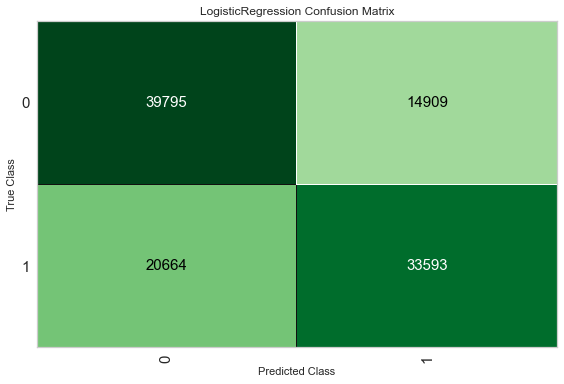

In [28]:
plot_model(model_lr,'confusion_matrix')

Al analizar la matriz de confusión, se obtuvieron los siguientes hallazgos:

1. **Clasificación de la disponibilidad:** El modelo acertó en la clasificación de 39,795 registros como disponibles, sin embargo, erróneamente clasificó 20,664 registros.
2. **Clasificación de la indisponibilidad:** Se observó que el modelo logró clasificar correctamente 33,593 registros como indisponibles, pero cometió errores en la clasificación de 14,909 registros.


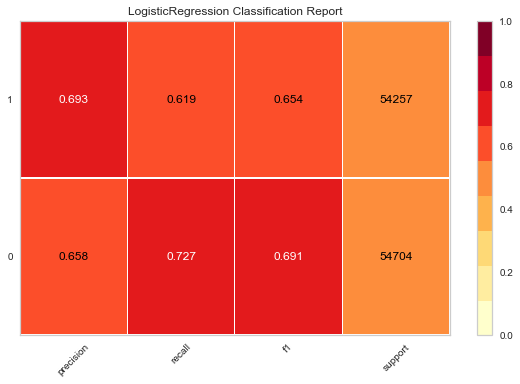

In [29]:
plot_model(model_lr,'class_report')

Por otro lado, al revisar el informe de clasificación, se identificaron los siguientes resultados detallados:

1. **Clasificación de la disponibilidad:** El modelo exhibió una precisión del 65.8\%, lo que indica que de todas las instancias clasificadas como disponibles, el 65.8\% realmente lo eran. Además, el modelo alcanzó una exhaustividad (recall) del 72.7\%, lo que significa que logró identificar el 72.7\% de todas las instancias realmente disponibles. La puntuación F1, que combina precisión y exhaustividad, fue de 0.691, y el soporte total de la clase de disponibilidad fue de 54,481 instancias.
2. **Clasificación de la indisponibilidad:** En cuanto a la clasificación de la indisponibilidad, el modelo mostró una precisión del 69.3\%, lo que indica que el 69.3\% de todas las instancias clasificadas como indisponibles realmente lo eran. La exhaustividad fue del 61.9\%, lo que significa que logró identificar correctamente el 61.9\% de todas las instancias realmente indisponibles. La puntuación F1 para esta clase fue de 0.654, y el soporte total fue de 54,257 instancias.

A continuación, un gráfico de importancia de características, el cual brinda información sobre la importancia relativa de diferentes variables en el modelo. El eje x representa la importancia de la variable, mientras que el eje y lista las diversas características:

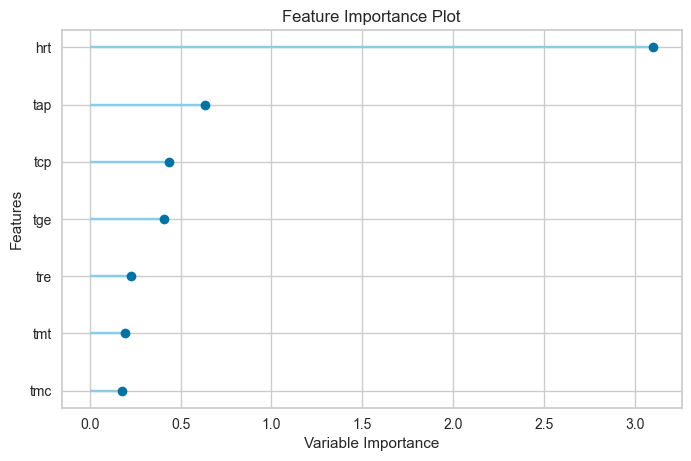

In [31]:
plot_model(model_lr,'feature')

Según el gráfico, la característica más importante parece ser hrt, seguida por tap. Esto sugiere que estas características tienen el mayor impacto en las predicciones del modelo.

En general, la combinación de análisis de importancia de características y validación cruzada proporciona una comprensión integral de las fortalezas, debilidades y áreas de optimización potencial del modelo. Esta información puede ser valiosa para refinar el modelo, seleccionar las características más relevantes y garantizar que el rendimiento del modelo sea confiable y generalizable.

La segunda imagen muestra un gráfico de Validación Cruzada, que es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. El eje y representa la métrica que se está evaluando , accuracy, mientras que el eje x muestra los diferentes pliegues o iteraciones del proceso de validación cruzada:

In [ ]:
plot_model(model_lr,'vc')

El gráfico indica un rendimiento relativamente estable en los diferentes pliegues, con fluctuaciones menores. Esto sugiere que el modelo es capaz de generalizar bien y de mantener un rendimiento consistente en datos no vistos, lo cual es un aspecto importante de la evaluación del modelo.

Basándonos en estos dos análisis, podemos proporcionar las siguientes conclusiones:

1. **Importancia de las Características**
    - Las características más importantes en el modelo son \textit{hrt} y \textit{tap}.
    - Estas características tienen el mayor impacto en las predicciones del modelo y deberían ser consideradas con mayor atención durante la selección de características y la optimización del modelo.
    - Es importante comprender el significado y la relación de estas características con la variable objetivo para garantizar que el modelo esté capturando los patrones relevantes en los datos.
2. **Validación Cruzada:**
    - El rendimiento estable en los pliegues de validación cruzada sugiere que el modelo es capaz de generalizar bien y de mantener un rendimiento consistente en datos no vistos.
    - Los resultados de la validación cruzada también pueden utilizarse para estimar el rendimiento esperado del modelo en datos futuros, fuera de la muestra, lo cual es crucial para evaluar la eficacia general del modelo.

  
En general, la combinación de análisis de importancia de características y validación cruzada proporciona una comprensión integral de las fortalezas, debilidades y áreas de optimización potencial del modelo. Esta información puede ser valiosa para refinar el modelo, seleccionar las características más relevantes y garantizar que el rendimiento del modelo sea confiable y generalizable.

#### 4.5.2 Decision Tree Classifier

En el proceso de evaluación del modelo, se emplearon dos herramientas fundamentales: la matriz de confusión y el informe de clasificación. Estas técnicas proporcionan una evaluación exhaustiva del desempeño del modelo, ofreciendo métricas clave como precisión, exhaustividad, puntuación F1 y soporte.

In [33]:
model_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9921,0.9946,0.9953,0.9886,0.9919,0.9843,0.9843
1,0.9923,0.9949,0.9963,0.9878,0.9921,0.9845,0.9845
2,0.9938,0.9960,0.9947,0.9925,0.9936,0.9876,0.9876
3,0.9927,0.9958,0.9952,0.9898,0.9925,0.9854,0.9854
4,0.9933,0.9955,0.9949,0.9913,0.9931,0.9865,0.9865
5,0.9933,0.9957,0.9963,0.9899,0.9931,0.9865,0.9865
6,0.9934,0.9952,0.9948,0.9917,0.9932,0.9868,0.9868
7,0.9931,0.9956,0.9948,0.9910,0.9929,0.9862,0.9862
8,0.9937,0.9958,0.9956,0.9915,0.9935,0.9874,0.9874


Al analizar la matriz de confusión, se obtuvieron los siguientes hallazgos:

1. **Clasificación de la disponibilidad:** El modelo acertó en la clasificación de 53,954 registros como disponibles, sin embargo, erróneamente clasificó 4,394 registros.
2. **Clasificación de la indisponibilidad:** Se observó que el modelo logró clasificar correctamente 49,863 registros como indisponibles, pero cometió errores en la clasificación de 750 registros.

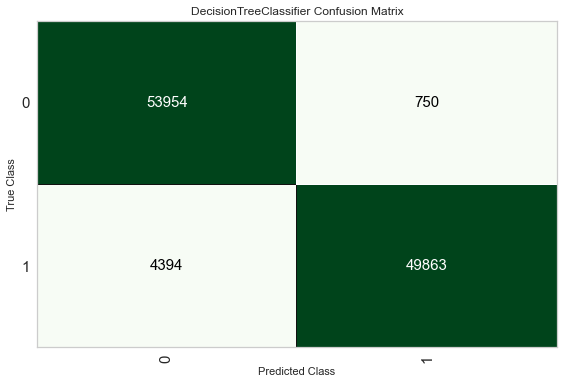

In [34]:
plot_model(model_dt,'confusion_matrix')

Por otro lado, al revisar el informe de clasificación, se identificaron los siguientes resultados detallados:

1. **Clasificación de la disponibilidad:** el modelo mostró una precisión del 92.5\%, lo que significa que del total de instancias clasificadas como disponibles, el 92.5\% realmente lo eran. Además, alcanzó una exhaustividad del 98.6\%, lo que indica que identificó correctamente el 98.6\% de todas las instancias realmente disponibles. La puntuación F1, que combina precisión y exhaustividad, fue de 0.954. El soporte total de la clase de disponibilidad fue de 54,704 instancias.
2. **Clasificación de la indisponibilidad:** el modelo exhibió una precisión del 98.5\%, lo que significa que el 98.5\% de las instancias clasificadas como indisponibles realmente lo eran. La exhaustividad fue del 91.9\%, lo que indica que identificó correctamente el 91.9\% de todas las instancias realmente indisponibles. La puntuación F1 para esta clase fue de 0.951. El soporte total fue de 54,257 instancias.

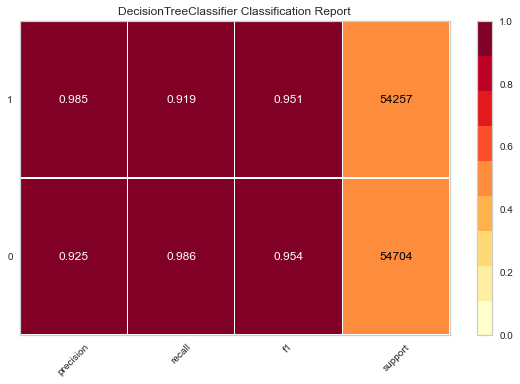

In [35]:
plot_model(model_dt,'class_report')

un Gráfico de Importancia de Características para un modelo de árbol de decisión. Este gráfico brinda información sobre la importancia relativa de las diferentes características o variables utilizadas en el modelo.

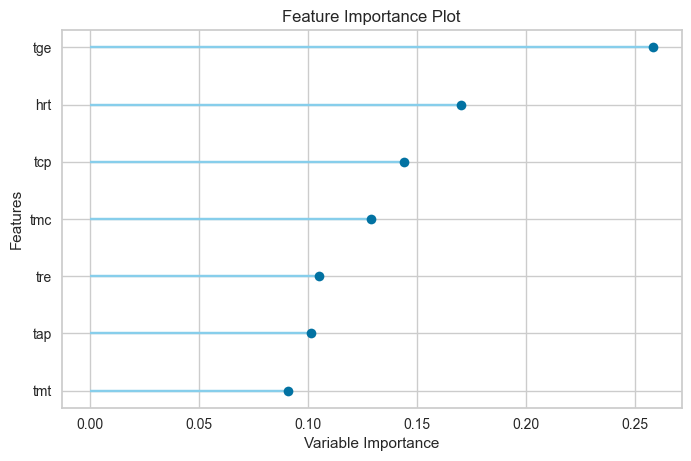

In [36]:
plot_model(model_dt,'feature')

Según el gráfico, la característica más importante parece ser tge, seguida de hrt, tcp y tmc. Esto sugiere que el modelo depende en gran medida de estas características para realizar sus predicciones, y es probable que tengan el mayor impacto en el rendimiento general del modelo.

La segunda imagen muestra un gráfico de Validación Cruzada. El eje y representa la métrica que se está evaluando, precisión.\\

In [ ]:
plot_model(model_dt,'vc')

El aumento constante en la métrica de rendimiento a lo largo del eje x, que representa los diferentes pliegues o iteraciones del proceso de validación cruzada, sugiere que el modelo puede generalizar bien y mantener un rendimiento consistente en datos no vistos. Esta es una indicación positiva de que el modelo es robusto y se puede esperar que funcione de manera confiable en aplicaciones del mundo real.

Basándonos en estos dos análisis, podemos proporcionar las siguientes conclusiones:

1. **Importancia de las Características:**
    - Las características más importantes en el modelo de árbol de decisión son \textit{tge, hrt, tcp y tmc}.
    - Estas características tienen el mayor impacto en las predicciones del modelo y deben ser consideradas con mayor atención durante la selección de características y la optimización del modelo.
    - Comprender las relaciones e interacciones entre estas características clave y la variable objetivo puede proporcionar información valiosa sobre los patrones y factores subyacentes en los datos.

2. **Validación Cruzada:**
    - El aumento constante en la métrica de rendimiento a lo largo de los pliegues de validación cruzada indica que el modelo puede generalizar bien y mantener un rendimiento consistente en datos no vistos.
    - Esto sugiere que es probable que el modelo sea robusto y confiable en aplicaciones del mundo real, ya que puede aplicar consistentemente los patrones aprendidos a instancias nuevas y no vistas.


En general, la combinación de la importancia de las características y los análisis de validación cruzada proporciona una comprensión integral de las fortalezas, debilidades y áreas de optimización potencial del modelo de árbol de decisión. 

#### 4.5.3 Random Forest Classifier

En el proceso de evaluación del modelo, se emplearon dos herramientas fundamentales: la matriz de confusión y el informe de clasificación. Estas técnicas proporcionan una evaluación exhaustiva del desempeño del modelo, ofreciendo métricas clave como precisión, exhaustividad, puntuación F1 y soporte:

In [37]:
model_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9934,0.9966,0.9953,0.9912,0.9932,0.9868,0.9868
1,0.9939,0.9971,0.9963,0.9912,0.9938,0.9878,0.9878
2,0.9945,0.9976,0.9947,0.9940,0.9944,0.9891,0.9891
3,0.9943,0.9978,0.9952,0.9931,0.9942,0.9886,0.9887
4,0.9942,0.9972,0.9949,0.9931,0.9940,0.9883,0.9883
5,0.9945,0.9974,0.9963,0.9925,0.9944,0.9890,0.9890
6,0.9943,0.9964,0.9949,0.9935,0.9942,0.9886,0.9886
7,0.9937,0.9974,0.9945,0.9926,0.9935,0.9874,0.9874
8,0.9945,0.9972,0.9953,0.9933,0.9943,0.9889,0.9889


Al analizar la matriz de confusión, se obtuvieron los siguientes hallazgos:

1. **Clasificación de la disponibilidad:** El modelo acertó en la clasificación de 54,314 registros como disponibles, sin embargo, erróneamente clasificó 4,357 registros.
2. **Clasificación de la indisponibilidad:** Se observó que el modelo logró clasificar correctamente 49,900 registros como indisponibles, pero cometió errores en la clasificación de 390 registros.

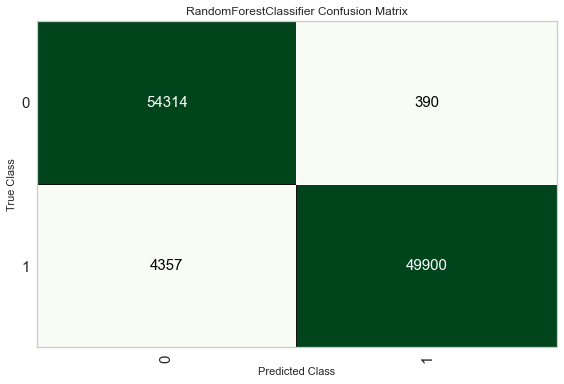

In [38]:
plot_model(model_rf,'confusion_matrix')

Por otro lado, al revisar el informe de clasificación, se identificaron los siguientes resultados detallados:

1. **Clasificación de la disponibilidad:** el modelo mostró una precisión del 92.6\%, lo que significa que del total de instancias clasificadas como disponibles, el 92.6\% realmente lo eran. Además, alcanzó una exhaustividad del 99.3\%, lo que indica que identificó correctamente el 99.3\% de todas las instancias realmente disponibles. La puntuación F1, que combina precisión y exhaustividad, fue de 0.958. El soporte total de la clase de disponibilidad fue de 54,704 instancias.
2. **Clasificación de la indisponibilidad:** el modelo exhibió una precisión del 99.2\%, lo que significa que el 99.2\% de las instancias clasificadas como indisponibles realmente lo eran. La exhaustividad fue del 92.0\%, lo que indica que identificó correctamente el 92.0\% de todas las instancias realmente indisponibles. La puntuación F1 para esta clase fue de 0.955. El soporte total fue de 54,257 instancias.

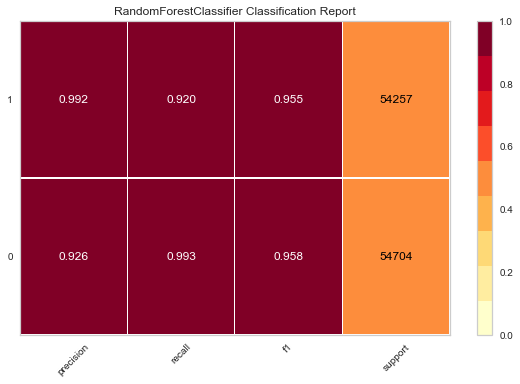

In [39]:
plot_model(model_rf,'class_report')

un Gráfico de Importancia de Características para un modelo de árbol de decisión. Este gráfico brinda información sobre la importancia relativa de las diferentes características o variables utilizadas en el modelo.

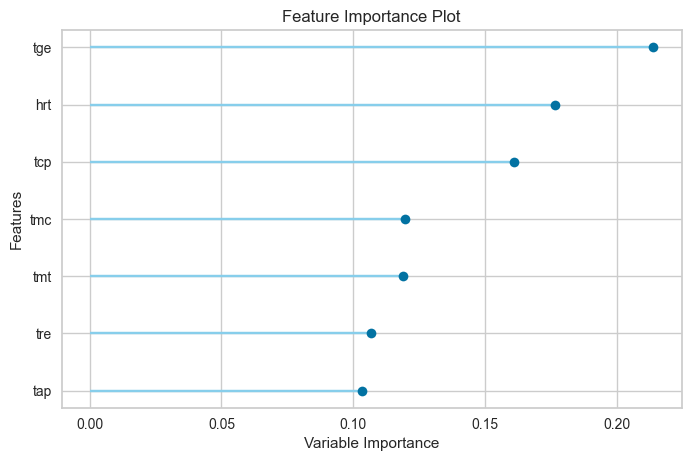

In [40]:
plot_model(model_rf,'feature')

Según el gráfico, la característica más importante parece ser tge, seguida de hrt, tcp, y tmc. Esto sugiere que el modelo depende en gran medida de estas características para realizar sus predicciones, y es probable que tengan el mayor impacto en el rendimiento general del modelo.

La segunda imagen muestra un gráfico de Validación Cruzada. El eje y representa la métrica que se está evaluando, precisión.

In [ ]:
plot_model(model_rf,'vc')

El aumento constante en la métrica de rendimiento a lo largo del eje x, que representa los diferentes pliegues o iteraciones del proceso de validación cruzada, sugiere que el modelo puede generalizar bien y mantener un rendimiento consistente en datos no vistos. Esta es una indicación positiva de que el modelo es robusto y se puede esperar que funcione de manera confiable en aplicaciones del mundo real.

Basándonos en estos dos análisis, podemos proporcionar las siguientes conclusiones:

1. **Importancia de las Características:**
    - Las características más importantes en el modelo de árbol de decisión son \textit{tge, hrt, tcp, tmc}.
    - Estas características tienen el mayor impacto en las predicciones del modelo y deben ser consideradas con mayor atención durante la selección de características y la optimización del modelo.
    - Comprender las relaciones e interacciones entre estas características clave y la variable objetivo puede proporcionar información valiosa sobre los patrones y factores subyacentes en los datos.

2. **Validación Cruzada:**
    - El aumento constante en la métrica de rendimiento a lo largo de los pliegues de validación cruzada indica que el modelo puede generalizar bien y mantener un rendimiento consistente en datos no vistos.
    - Esto sugiere que es probable que el modelo sea robusto y confiable en aplicaciones del mundo real, ya que puede aplicar consistentemente los patrones aprendidos a instancias nuevas y no vistas.

En general, la combinación de la importancia de las características y los análisis de validación cruzada proporciona una comprensión integral de las fortalezas, debilidades y áreas de optimización potencial del modelo de árbol de decisión. 

## 5. Conclusión

En la investigación propuesta, fue posible identificar variables clave relacionadas con la operación de los recursos de generación de la central termoeléctrica Termoguajira, las cuales se encuentran vinculadas con la disponibilidad de dichos recursos. Estas variables incluyen los tiempos de generación, tiempos a mínimo técnico, tiempos a carga parcial, tiempos en reserva, tiempos de arranque-parada, tiempos a máxima carga y el heat rate. Esta información permitió seleccionar los mejores atributos para el entrenamiento de modelos de aprendizaje supervisado, con el objetivo de detectar los estados de disponibilidad o indisponibilidad de los recursos de generación térmica de la central Termoguajira.

Se realizó una comparación de diferentes modelos, donde se identificó que los modelos basados en árboles de decisión son los más adecuados para este problema de clasificación en particular. Los modelos que presentaron los mejores rendimientos fueron Extra Trees Classifier, Random Forest Classifier y Decision Tree Classifier, con un promedio de precisión por encima del 95\%.

A partir del conjunto de datos utilizado para este proyecto, se pudo establecer que es posible realizar predicciones de disponibilidad de las centrales de generación tomando como referencia únicamente la operación diaria de dichas unidades. Es decir, la dinámica de funcionamiento de las unidades térmicas influye directamente en la disponibilidad de estos recursos.

Con la investigación realizada, se pudo desarrollar un modelo capaz de predecir la disponibilidad de la central Termoguajira a partir de la operación diaria de los recursos de generación, con un alto porcentaje de exactitud. Esto sienta las bases para construir un modelo de predicción más robusto, que pueda aplicarse a todas las unidades de generación conectadas al sistema interconectado nacional. Esto ayudaría al área de planificación de la operación diaria a mejorar la coordinación de la operación, evitando indisponibilidades no planificadas y penalizaciones económicas.

Estos hallazgos no solo respaldan la idoneidad del modelo para pronosticar la disponibilidad de los recursos de generación en la subárea GCM, sino que también proporcionan una base sólida para la implementación de medidas preventivas y estrategias de contingencia. La capacidad del modelo para realizar predicciones precisas abre la puerta a la mejora continua de la seguridad y confiabilidad del suministro eléctrico en la mencionada subárea.